## Example Plot 1

In [207]:
import pylevin as levin
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, jv
from scipy import integrate


x_length = 100
N = 2
y = np.linspace(1,2, N) 
x = np.geomspace(1e-5,100,x_length) #define support
f_of_x = x[:,None]**(3*y[None,:]) + (x**2 +x)[:, None] #define integrands f(x) 

integral_type = 2
N_thread = 1 # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
lp_double = levin.pylevin(integral_type, x, f_of_x, logx, logy, N_thread) #Constructor of the class

n_sub = 6 #number of collocation points in each bisection
n_bisec_max = 32 #maximum number of bisections used
rel_acc = 1e-4 #relative accuracy target
boost_bessel = True #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = True #should the code talk to you?
lp_double.set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)

M = 1000
k = np.geomspace(1e-2,1000,M)
ell_1 = (5*np.ones_like(k)).astype(int)
ell_2 = (10*np.ones_like(k)).astype(int)
result_levin = np.zeros((M, N)) #allocate the result
quad_result = np.zeros_like(result_levin)


t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")

t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")

t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")


t0 = time.time()
for k_i, k_val in enumerate(k):
    for i_integral in range(N):
        integrand_quad = lambda xquad: ((xquad**(3*y[i_integral]) + xquad**2 + xquad)*spherical_jn(ell_1[0],k_val*xquad) * spherical_jn(ell_2[0],k_val*xquad))
        quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]
print("Quadrature took", time.time() -t0, "s")



Levin took 0.23203611373901367 s
Levin took 0.12446212768554688 s
Levin took 0.011002063751220703 s


/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_89721/3484796912.py:53: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]
/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_89721/3484796912.py:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]


Quadrature took 51.31677222251892 s


<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_89721/738200200.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("$\mathrm{relative\, difference}$", fontsize = 14)
/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_89721/738200200.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("$\mathrm{relative\, difference}$", fontsize = 14)


ValueError: operands could not be broadcast together with shapes (1000,) (256,) 

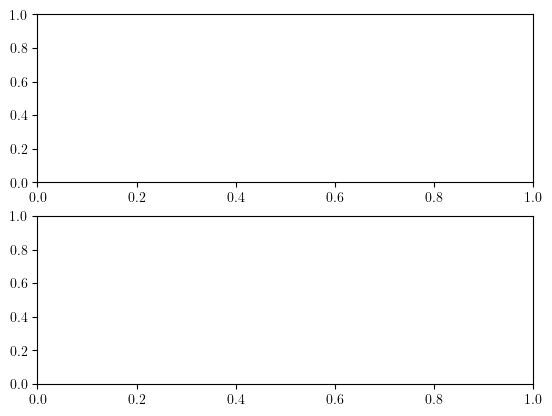

In [206]:
import matplotlib as mpl

fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(2)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

ax[0].semilogx(k,quad_result[:,0]*k**2,ls = "-", label = r"$\begin{array}{c}\mathrm{\bf{adaptive\; quadrature}} \\ \mathrm{took\;}25\,\mathrm{s}\end{array}$", color = "blue", lw = 2)
ax[0].semilogx(k,result_levin[:,0]*k**2, ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}5\times 10^{-3}\mathrm{s}\end{array}$", color = "red", lw = 2)
ax[0].set_ylabel(r"$k^2 \times\mathrm{integral}$", fontsize = 14)
ax[0].legend(fontsize = 10, loc = 'lower right', ncols = 2, frameon=True)
ax[0].set_ylim(1.1*np.min(result_levin[:,0]*k**2),1.1*np.max(result_levin[:,0]*k**2))
ax[0].set_xlim(k[0],k[-1])
ax[0].set_xticks([])
ax[0].axvspan(60, k[-1], color='grey', alpha=0.2)


ax[1].semilogx(k, (quad_result[:,0] - result_levin[:,0])/result_levin[:,0], color = "black", lw = 2)
ax[1].set_xlabel(r"$k$", fontsize = 16)
ax[1].set_ylabel("$\mathrm{relative\, difference}$", fontsize = 14)
ax[1].set_ylim(-1e-3,1e-3)
ax[1].set_xlim(k[0],k[-1])
ax[1].axvspan(60, k[-1], color='grey', alpha=0.2)

plt.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig("paper_plot_two_bessel.pdf")

## Comparison with other Methods: Hankel

In [56]:
import pylevin as levin
import numpy as np
import time
import matplotlib.pyplot as plt
import hankel
from hankel import HankelTransform     # Import the basic class



x_length = 100
N = 1
x = np.geomspace(1e-5,1e8,x_length) #define support
y = np.linspace(1,2, N) 
f_of_x = x**2/(x**2+1)
integral_type = 1
N_thread = 4 # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
lp_single = levin.pylevin(integral_type, x, f_of_x[:,None], logx, logy, N_thread) #Constructor of the class


diagonal = False 
M = 500 #number of arguments at which the integrals are evaluated
k = np.geomspace(1e0,1e4,M)
ell = (0*np.ones_like(k)).astype(int) #order of the Bessel function, needs to be an integer


n_sub = 6 #number of collocation points in each bisection
n_bisec_max = 28 #maximum number of bisections used
rel_acc = 1e-6 #relative accuracy target
boost_bessel = False #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = False #should the code talk to you?
lp_single.set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)

result_levin = np.zeros((M, N)) #allocate the result
lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)


t0 = time.time()

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)

print("Levin took", time.time() -t0, "s")



Levin took 0.002604961395263672 s


Hankel took 0.0012977123260498047 s


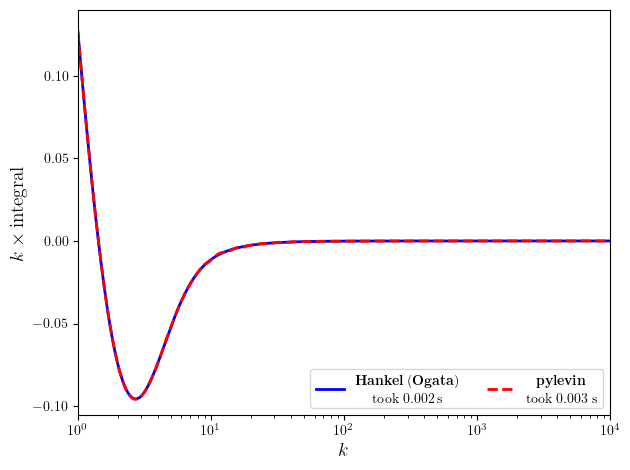

In [60]:
import matplotlib as mpl


ht = HankelTransform(
    nu= 0,     # The order of the bessel function
    N = 120,   # Number of steps in the integration
    h = 0.03   # Proxy for "size" of steps in integration
)

f = lambda x : x/(x**2 + 1)
t0 = time.time()
Fk = ht.transform(f,k,ret_err=False) # Return the transform of f at k.
print("Hankel took", time.time() -t0, "s")



fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(1)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'


ax.semilogx(k,Fk*k,ls = "-", label = r"$\begin{array}{c}\mathrm{\bf{Hankel\;(Ogata)}} \\ \mathrm{took\;}0.002\,\mathrm{s}\end{array}$", color = "blue", lw = 2)
ax.semilogx(k,result_levin[:,0]*k, ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}0.003\;\mathrm{s}\end{array}$", color = "red", lw = 2)
ax.set_ylabel(r"$k \times\mathrm{integral}$", fontsize = 14)
ax.set_xlabel(r"$k$", fontsize = 14)
ax.legend(fontsize = 10, loc = 'lower right', ncols = 2, frameon=True)
ax.set_ylim(1.1*np.min(result_levin[:,0]*k),1.1*np.max(result_levin[:,0]*k))
ax.set_xlim(k[0],k[-1])

plt.tight_layout()
plt.savefig("paper_plot_compare_hankel.pdf")




## Comparison with other Methods: Hankl

Hankl took 0.0013852119445800781 s
Levin took 0.004357099533081055 s


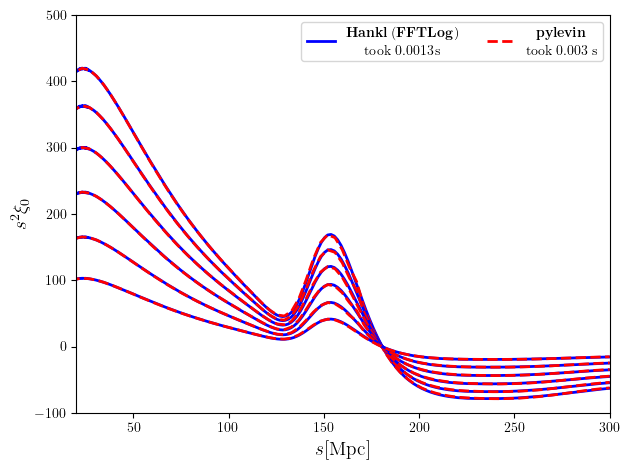

In [112]:
import pylevin as levin
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

import hankl
import pyccl as ccl


cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96, 
                      transfer_function='boltzmann_camb')

k = np.logspace(-4, 1, 2**10)
a = np.linspace(1,0.4,6) # Scale factor a z=0

pk_lin_a = ccl.linear_matter_power(cosmo, k, a)

t0 = time.time()
result_hankl = []
P0_arr = []
for i in range(len(a)):
    pk_lin = pk_lin_a[i]
    def get_multipoles(b, f):

        p0 = (b*b + 2.0 * b *f / 3.0 + f*f/5.0 ) * pk_lin

        p2 = (4.0*b*f/3.0 + 4.0*f*f/7.0) * pk_lin

        p4 = (8.0* f*f / 35.0) * pk_lin

        return p0, p2, p4

    P0, P2, P4 = get_multipoles(b=2.0, f=0.5)
    P0_arr.append(P0)
    s_hankel, xi0 = hankl.P2xi(k, P0, l=0)
    result_hankl.append(xi0)
print("Hankl took", time.time() -t0, "s")

P0_arr = np.array(P0_arr).T
x = np.copy(k)
N = len(a)
integral_type = 0
N_thread = 4 # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
lp_single = levin.pylevin(integral_type, k, (k**2)[:, None]*P0_arr, logx, logy, N_thread) #Constructor of the class


diagonal = False 
M = 80 #number of arguments at which the integrals are evaluated
s = np.linspace(2e-1,3e2,M)
ell = (0*np.ones_like(s)).astype(int) #order of the Bessel function, needs to be an integer


n_sub = 8 #number of collocation points in each bisection
n_bisec_max = 32 #maximum number of bisections used
rel_acc = 1e-8 #relative accuracy target
boost_bessel = False #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = False #should the code talk to you?
lp_single.set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)

result_levin = np.zeros((M, N)) #allocate the result
lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(s), x[-1]*np.ones_like(s), s, ell, diagonal, result_levin)

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(s), x[-1]*np.ones_like(s), s, ell, diagonal, result_levin)


t0 = time.time()

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(s), x[-1]*np.ones_like(s), s, ell, diagonal, result_levin)

print("Levin took", time.time() -t0, "s")







fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(1)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

for i in range(len(a)):
    if i == 0:
        ax.plot(s_hankel,s_hankel**2*result_hankl[i],ls = "-", label = r"$\begin{array}{c}\mathrm{\bf{Hankl\;(FFTLog)}} \\ \mathrm{took\;}0.0013\,\mathrm{s}\end{array}$", color = "blue", lw = 2)
        ax.plot(s,s**2*result_levin[:,i]/2/np.pi**2, ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}0.003\;\mathrm{s}\end{array}$", color = "red", lw = 2)
    else:
        ax.plot(s_hankel,s_hankel**2*result_hankl[i],ls = "-",  color = "blue", lw = 2)
        ax.plot(s,s**2*result_levin[:,i]/2/np.pi**2, ls = "--",  color = "red", lw = 2)
ax.set_ylabel(r"$s^2 \xi_0$", fontsize = 14)
ax.set_xlabel(r"$s [\mathrm{Mpc}]$", fontsize = 14)
ax.legend(fontsize = 10, loc = 'upper right', ncols = 2, frameon=True)
ax.set_ylim(-100,500)
ax.set_xlim(20, s[-1])

plt.tight_layout()
plt.savefig("paper_plot_compare_fftlog.pdf")








In [1]:
import pyccl as ccl
import pylevin as levin
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline



cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.7, sigma8=0.8, n_s=0.965)

z = np.linspace(0.55, .65, 100)
nz = np.exp(-0.5*((z-.6)/.01)**2)
b1 = np.ones_like(z)
tracers = {}
tracers['g']  = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z, nz), bias=(z, b1))
ell = np.unique((np.geomspace(2, 400)).astype(int))


chi = ccl.comoving_radial_distance(cosmo,1/(1+z))
kmin, kmax, nk = 1e-4, 1e1, 500
k = np.geomspace((kmin), (kmax), nk) # Wavenumber
pk_nl = []
for zet in z:
    pk_nl.append(ccl.nonlin_matter_power(cosmo, k, 1/(1+zet)))
pk_nl = np.array(pk_nl)


spl = UnivariateSpline(chi, z, k=2, s=0)
dzdchi = spl.derivative()(chi)
norm = 1/np.trapz(nz*dzdchi,chi)
nofchi = dzdchi*nz*norm
idx_non_zero = np.where(nofchi >0)[0]
mean_chi = np.argmin(np.abs(chi - np.trapz(nz*dzdchi*norm*chi,chi)))

t0 = time.time()
cls = ccl.angular_cl(cosmo, tracers['g'], tracers['g'], ell, l_limber = 10009,limber_max_error=0.0001) 
print("CCL took", time.time() -t0, "s")

cls1 = ccl.angular_cl(cosmo, tracers['g'
], tracers['g'], ell, l_limber = 1,limber_max_error=0.0001)


integral_type = 0
N_thread = 4 # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
n_sub = 6 #number of collocation points in each bisection
n_bisec_max = 4 #maximum number of bisections used
rel_acc = 2e-3 #relative accuracy target
boost_bessel = True #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = False #should the code talk to you?

lower_limit = k[0]*np.ones_like(ell)
upper_limit = np.ones_like(ell)

N_int = int(5e2)
k_int = np.geomspace(k[0], 1e0, N_int)

inner_int = np.zeros((len(ell), len(k_int)))
pk_nl_new = np.zeros((len(z), len(k_int)))
for zet_i, zet_val in enumerate(z):
    pk_nl_new[zet_i,:] = (ccl.nonlin_matter_power(cosmo, k_int, 1/(1+zet_val)))

lp_ell = []
lower_limit = chi[idx_non_zero[0]]*np.ones_like(k_int)
upper_limit = chi[idx_non_zero[-1]]*np.ones_like(k_int)

t0 = time.time()
for i_ell, val_ell in enumerate(ell):
    lp = levin.pylevin(integral_type, chi[idx_non_zero], np.sqrt(pk_nl_new[idx_non_zero,:])*nofchi[idx_non_zero,None], logx, logy, N_thread)
    lp_ell.append(lp)
    lp_ell[i_ell].set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)
    ell_values = (val_ell*np.ones_like(k_int)).astype(int)
    lp_ell[i_ell].levin_integrate_bessel_single(lower_limit, upper_limit, k_int, ell_values, True, inner_int[i_ell,:])
print("Levin took", time.time() -t0, "s")
t0 = time.time()
for i_ell, val_ell in enumerate(ell):
    ell_values = (val_ell*np.ones_like(k_int)).astype(int)
    lp_ell[i_ell].levin_integrate_bessel_single(lower_limit, upper_limit, k_int, ell_values, True, inner_int[i_ell,:])
print("Levin took", time.time() -t0, "s")

ell_values = (ell[:,None]*np.ones_like(k_int)[None,:]).astype(int)

t0 = time.time()

for i_ell, val_ell in enumerate(ell):
    lp_ell[i_ell].levin_integrate_bessel_single(lower_limit, upper_limit, k_int, ell_values[i_ell,:], True, inner_int[i_ell,:])
print("Levin took", time.time() -t0, "s")

result_levin_second = 2/np.pi*np.trapz(inner_int**2*k_int**2,k_int, axis = -1)
    

from scipy.special import spherical_jn



N_int = int(1e3)
k_int = np.geomspace(k[0], 1, N_int)
bessel = []
power_alt = []
for i_chi, val_chi in enumerate(chi[idx_non_zero]):
    bessel.append([])
    power = ccl.nonlin_matter_power(cosmo,k_int,1./(1+z[idx_non_zero[i_chi]]))

    power_alt.append(power)
    for ell_i, ell_val in enumerate(ell):
        bessel[i_chi].append(spherical_jn(ell_val,val_chi*k_int)*np.sqrt(power))

bessel = np.array(bessel)
power_alt = np.array(power_alt)
integral_1 = np.trapz(nofchi[idx_non_zero,None, None]*bessel,chi[idx_non_zero], axis=0)
result = 2/np.pi*np.trapz(integral_1**2*k_int**2,k_int, axis = -1)
    
integ_1 = np.trapz(bessel*(nofchi[idx_non_zero])[:,None, None],chi[idx_non_zero], axis = 0)

result_new = 2/np.pi*np.trapz((integ_1*k_int[None,:])**2,k_int,axis = -1)





CCL took 0.015933990478515625 s
Levin took 0.7458739280700684 s
Levin took 0.5422408580780029 s
Levin took 0.030308246612548828 s


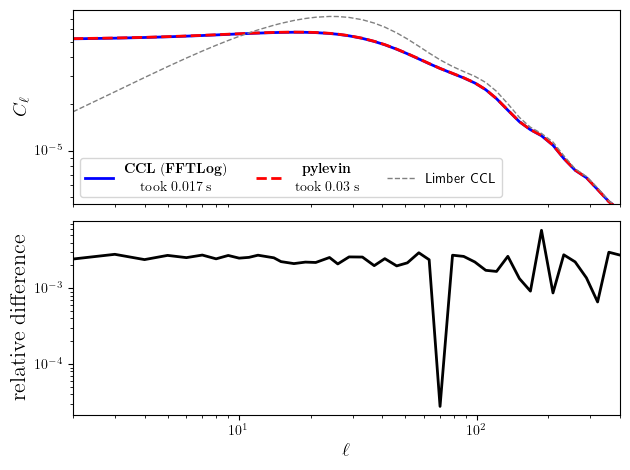

In [3]:
fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(2)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

ax[0].loglog(ell,result_new, ls = "-", label = r"$\begin{array}{c}\mathrm{\bf{CCL\;(FFTLog)}} \\ \mathrm{took\; 0.017\;s}\end{array}$", lw= 2, color = "blue")
ax[0].loglog(ell,result_levin_second, ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}0.03\;\mathrm{s}\end{array}$", lw = 2, color = "red")
ax[0].loglog(ell,cls1, ls = "--", color = "grey", label = r"Limber CCL", lw = 1)

ax[0].set_ylim(1.1*np.min(result_levin_second),1.1*np.max(cls1))
ax[0].set_xlim(ell[0],ell[-1])
ax[0].set_xticks([])


ax[1].loglog(ell, np.abs(result_levin_second- result_new)/result_new, color = "black", lw = 2)
ax[1].set_xlabel(r"$\ell$", fontsize = 16)
ax[1].set_ylabel(r"$\mathrm{relative\;difference}$", fontsize = 16)
ax[1].set_xlim(ell[0],ell[-1])



ax[1].set_xlabel(r"$\ell$", fontsize = 14)
ax[0].set_ylabel(r"$C_\ell$", fontsize = 14)
ax[0].legend(fontsize = 10, loc = 'lower left', ncols = 3, frameon=True)



plt.tight_layout()
plt.savefig("paper_plot_compare_CCL.pdf")






## Compare to pyfftlog

In [202]:
import pyfftlog
import numpy as np
import matplotlib.pyplot as plt

# Range of periodic interval
logrmin = -4
logrmax = 4

# Number of points (Max 4096)
n = 256

# Order mu of Bessel function

# Bias exponent: q = 0 is unbiased
q = 0

# Sensible approximate choice of k_c r_c
kr = 1

# Tell fhti to change kr to low-ringing value
# WARNING: kropt = 3 will fail, as interaction is not supported
kropt = 1

# Forward transform (changed from dir to tdir, as dir is a python fct)
tdir = 1

# Central point log10(r_c) of periodic interval
logrc = (logrmin + logrmax)/2

print(f"Central point of periodic interval at log10(r_c) = {logrc}")

# Central index (1/2 integral if n is even)
nc = (n + 1)/2.0

# Log-spacing of points
dlogr = (logrmax - logrmin)/n
dlnr = dlogr*np.log(10.0)

mu = 4

r = 10**(logrc + (np.arange(1, n+1) - nc)*dlogr)
ar = r**(mu + 1)*np.exp(-r**2/2.0)

t0 = time.time()
kr, xsave = pyfftlog.fhti(n, mu, dlnr, q, kr, kropt)

logkc = np.log10(kr) - logrc

# rk = r_c/k_c
rk = 10**(logrc - logkc)
k = 10**(logkc + (np.arange(1, n+1) - nc)*dlogr)

# Transform
# ak = pyfftlog.fftl(ar.copy(), xsave, rk, tdir)
ak = pyfftlog.fht(ar.copy(), xsave, tdir)
print("FFTLOg took", time.time()-t0)


Central point of periodic interval at log10(r_c) = 0.0
FFTLOg took 0.0010018348693847656


In [203]:
import pylevin as levin
import numpy as np
import time
import matplotlib.pyplot as plt
import hankel
from hankel import HankelTransform     # Import the basic class



integral_type = 1
N=1
N_thread = 2  # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
lp_single = levin.pylevin(integral_type, r, (ar)[:,None], logx, logy, N_thread) #Constructor of the class

x = np.copy(r)
diagonal = False 
ell = (mu*np.ones_like(k)).astype(int) #order of the Bessel function, needs to be an integer


n_sub = 4 #number of collocation points in each bisection
n_bisec_max = 20 #maximum number of bisections used
rel_acc = 0 #relative accuracy target
boost_bessel = False #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = False #should the code talk to you?
lp_single.set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)

result_levin = np.zeros((len(k), N)) #allocate the result
lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)


t0 = time.time()

lp_single.levin_integrate_bessel_single(x[0]*np.ones_like(k), x[-1]*np.ones_like(k), k, ell, diagonal, result_levin)

result_levin = result_levin*k[:,None]
print("Levin took", time.time() -t0, "s")


Levin took 0.0015130043029785156 s


/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_89721/357026342.py:20: RuntimeWarning: divide by zero encountered in divide
  ax[1].loglog(k, np.abs(result_levin[:, 0]- ak)/ak, color = "black", lw = 2)


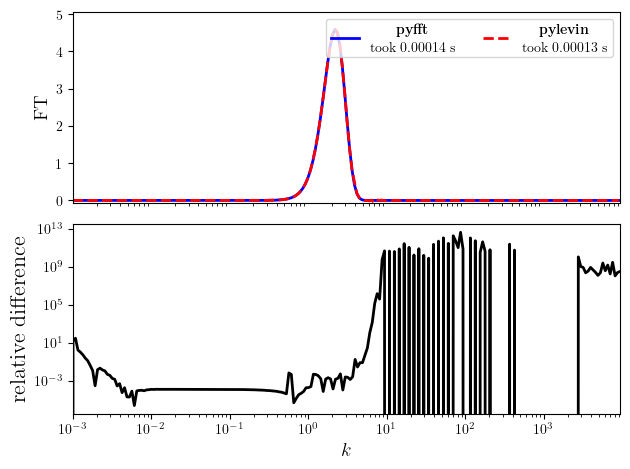

In [205]:
fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(2)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

ax[0].semilogx(k,ak, ls = "-", color = "blue", label = r"$\begin{array}{c}\mathrm{\bf{pyfft}}  \\ \mathrm{took\;}0.00014\;\mathrm{s}\end{array}$", lw = 2)
ax[0].semilogx(k,result_levin, ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}0.00013\;\mathrm{s}\end{array}$", lw = 2, color = "red")

ax[0].set_ylim(1.1*np.min(result_levin),1.1*np.max(result_levin))
ax[0].set_xlim(1e-3,x[-1])
ax[0].set_xticks([])


ax[1].loglog(k, np.abs(result_levin[:, 0]- ak)/ak, color = "black", lw = 2)
ax[1].set_xlabel(r"$k$", fontsize = 16)
ax[1].set_ylabel(r"$\mathrm{relative\;difference}$", fontsize = 16)
ax[1].set_xlim(1e-3,k[-1])



ax[1].set_xlabel(r"$k$", fontsize = 14)
ax[0].set_ylabel(r"$\mathrm{FT}$", fontsize = 14)
ax[0].legend(fontsize = 10, loc = 'upper right', ncols = 3, frameon=True)



plt.tight_layout()
plt.savefig("paper_plot_compare_pyfftlog.pdf")




